In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [398]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [399]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [400]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796340 entries, 0 to 1796339
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Interval  int64  
 1   kWh       float64
dtypes: float64(1), int64(1)
memory usage: 27.4 MB


In [401]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1796335    0.12
1796336    0.13
1796337    0.13
1796338    0.13
1796339    0.13
Name: kWh, Length: 1796340, dtype: float64

In [402]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1796335    0.12
1796336    0.13
1796337    0.13
1796338    0.13
1796339    0.13
Name: kWh, Length: 1796340, dtype: float64

In [403]:
l=len(conso_data)-1
l

1796339

In [404]:
conso_data['sec']=conso_data['Interval']/1000


In [405]:
conso_data['Wh']=3600000/conso_data['Interval']


In [406]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [407]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796340 entries, 0 to 1796339
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Interval   int64  
 1   kWh        float64
 2   sec        float64
 3   Wh         float64
 4   cumul(ms)  int64  
dtypes: float64(3), int64(2)
memory usage: 68.5 MB


In [408]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1796335,28947,0.12,28.947,124.365219,44198802703
1796336,27841,0.13,27.841,129.305700,44198830544
1796337,27821,0.13,27.821,129.398656,44198858365
1796338,28121,0.13,28.121,128.018207,44198886486
1796339,28511,0.13,28.511,126.267055,44198914997


In [409]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

44198914997000

In [410]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 20, 39, 35, 959469)

In [411]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [412]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [413]:
base

datetime.datetime(2023, 8, 21, 20, 39, 35, 959469)

In [414]:
# create column 'dates' with time cumulated time from base
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['dates']

0         2023-08-21 20:39:57.893469
1         2023-08-21 20:40:19.751469
2         2023-08-21 20:40:41.752469
3         2023-08-21 20:41:03.680469
4         2023-08-21 20:41:25.571469
                     ...            
1796335   2025-01-14 10:06:18.662469
1796336   2025-01-14 10:06:46.503469
1796337   2025-01-14 10:07:14.324469
1796338   2025-01-14 10:07:42.445469
1796339   2025-01-14 10:08:10.956469
Name: dates, Length: 1796340, dtype: datetime64[ns]

## créer les dates

In [415]:
# create column 'days' avec format 'dd/mm/yy'
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:39:57.893469,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:40:19.751469,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:40:41.752469,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:41:03.680469,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:41:25.571469,21/08/23
...,...,...,...,...,...,...,...
1796335,28947,0.12,28.947,124.365219,44198802703,2025-01-14 10:06:18.662469,14/01/25
1796336,27841,0.13,27.841,129.305700,44198830544,2025-01-14 10:06:46.503469,14/01/25
1796337,27821,0.13,27.821,129.398656,44198858365,2025-01-14 10:07:14.324469,14/01/25
1796338,28121,0.13,28.121,128.018207,44198886486,2025-01-14 10:07:42.445469,14/01/25


### save conso_data with dates

In [416]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [417]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('14/01/25', 14, 1, 2025)

In [418]:
here = now.strftime('%H:%M:%S')
here

'10:09:14'

In [419]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [420]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1182 entries, 1795158 to 1796339
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1182 non-null   int64         
 1   kWh        1182 non-null   float64       
 2   sec        1182 non-null   float64       
 3   Wh         1182 non-null   float64       
 4   cumul(ms)  1182 non-null   int64         
 5   dates      1182 non-null   datetime64[ns]
 6   days       1182 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 73.9+ KB


In [421]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [422]:
data = list(df_grp['kWh'])
print(data)

[0.628, 3.697, 4.238, 3.687, 3.986, 4.623, 3.68, 3.435, 3.517, 3.696, 3.52, 4.045, 4.244, 3.647, 3.634, 3.637, 3.313, 3.383, 4.092, 4.039, 4.023, 4.07, 3.49, 4.307, 3.899, 3.751, 4.14, 4.684, 4.032, 3.223, 3.173, 3.886, 3.788, 3.089, 3.789, 4.162, 3.648, 3.698, 4.629, 4.256, 4.49, 3.838, 3.449, 4.276, 3.9, 3.82, 3.493, 4.014, 3.714, 3.428, 4.134, 3.391, 3.845, 3.862, 3.617, 3.752, 4.288, 3.273, 3.874, 3.107, 2.056, 2.048, 2.343, 4.073, 3.668, 4.307, 3.632, 3.965, 3.768, 3.75, 4.166, 3.987, 3.763, 3.138, 3.76, 3.581, 3.56, 3.707, 3.682, 3.318, 3.825, 3.259, 3.754, 3.6, 4.068, 3.56, 3.511, 3.702, 4.109, 4.336, 3.933, 4.141, 4.271, 3.805, 3.919, 3.807, 3.777, 3.838, 4.054, 4.403, 3.887, 3.501, 3.68, 3.678, 3.347, 3.843, 3.882, 4.215, 3.525, 4.145, 3.606, 3.925, 4.662, 3.607, 3.553, 3.529, 4.02, 3.853, 4.101, 3.843, 3.854, 3.613, 5.093, 3.738, 3.739, 4.243, 4.17, 4.454, 4.462, 4.141, 3.625, 4.45, 4.744, 4.114, 4.76, 4.435, 3.676, 4.079, 3.85, 3.615, 3.567, 3.969, 3.667, 3.715, 3.632, 3.489

In [423]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [424]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [425]:
df = conso_data
len(df)

1796340

In [426]:
period(p=2)

2023-08-22 02:46:11.696469	2023-08-22 09:50:27.316469	7h 4m 15s 	2000


In [427]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.297925
dtype: float64

In [428]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.501637
dtype: float64

In [429]:
last=df_grp.iloc[-1]['kWh']
last

1.182

In [430]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1182 entries, 1795158 to 1796339
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1182 non-null   int64         
 1   kWh        1182 non-null   float64       
 2   sec        1182 non-null   float64       
 3   Wh         1182 non-null   float64       
 4   cumul(ms)  1182 non-null   int64         
 5   dates      1182 non-null   datetime64[ns]
 6   days       1182 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 73.9+ KB


In [431]:
# select day
day = today
#day = '16/08/24'


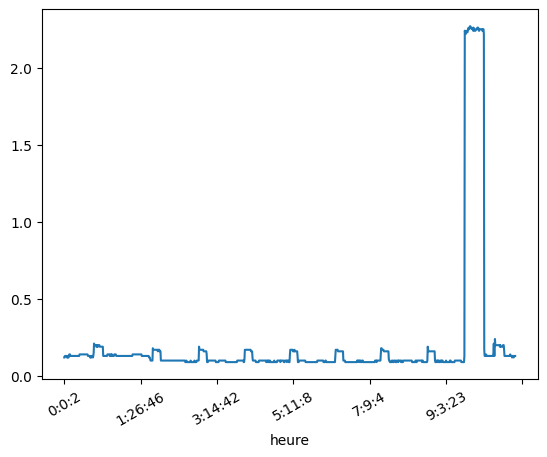

In [432]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [433]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:39:57.893469,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:40:19.751469,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:40:41.752469,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:41:03.680469,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:41:25.571469,21/08/23
...,...,...,...,...,...,...,...
1796335,28947,0.12,28.947,124.365219,44198802703,2025-01-14 10:06:18.662469,14/01/25
1796336,27841,0.13,27.841,129.305700,44198830544,2025-01-14 10:06:46.503469,14/01/25
1796337,27821,0.13,27.821,129.398656,44198858365,2025-01-14 10:07:14.324469,14/01/25
1796338,28121,0.13,28.121,128.018207,44198886486,2025-01-14 10:07:42.445469,14/01/25


In [434]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:2,29032,0.12,29.032,124.001102,44162426812,2025-01-14 00:00:02.771469,14/01/25
0:0:31,28823,0.12,28.823,124.900253,44162455635,2025-01-14 00:00:31.594469,14/01/25
0:0:58,27173,0.13,27.173,132.484451,44162482808,2025-01-14 00:00:58.767469,14/01/25
0:1:26,27298,0.13,27.298,131.877793,44162510106,2025-01-14 00:01:26.065469,14/01/25
0:1:54,28278,0.13,28.278,127.307447,44162538384,2025-01-14 00:01:54.343469,14/01/25
...,...,...,...,...,...,...,...
10:6:18,28947,0.12,28.947,124.365219,44198802703,2025-01-14 10:06:18.662469,14/01/25
10:6:46,27841,0.13,27.841,129.305700,44198830544,2025-01-14 10:06:46.503469,14/01/25
10:7:14,27821,0.13,27.821,129.398656,44198858365,2025-01-14 10:07:14.324469,14/01/25


In [435]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 23/12/24 5.038
Min : 21/12/24 3.044


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1795158,29032,0.12,29.032,124.001102,44162426812,2025-01-14 00:00:02.771469,14/01/25,0:0:2
1795159,28823,0.12,28.823,124.900253,44162455635,2025-01-14 00:00:31.594469,14/01/25,0:0:31
1795160,27173,0.13,27.173,132.484451,44162482808,2025-01-14 00:00:58.767469,14/01/25,0:0:58
1795161,27298,0.13,27.298,131.877793,44162510106,2025-01-14 00:01:26.065469,14/01/25,0:1:26
1795162,28278,0.13,28.278,127.307447,44162538384,2025-01-14 00:01:54.343469,14/01/25,0:1:54
...,...,...,...,...,...,...,...,...
1796335,28947,0.12,28.947,124.365219,44198802703,2025-01-14 10:06:18.662469,14/01/25,10:6:18
1796336,27841,0.13,27.841,129.305700,44198830544,2025-01-14 10:06:46.503469,14/01/25,10:6:46
1796337,27821,0.13,27.821,129.398656,44198858365,2025-01-14 10:07:14.324469,14/01/25,10:7:14
1796338,28121,0.13,28.121,128.018207,44198886486,2025-01-14 10:07:42.445469,14/01/25,10:7:42


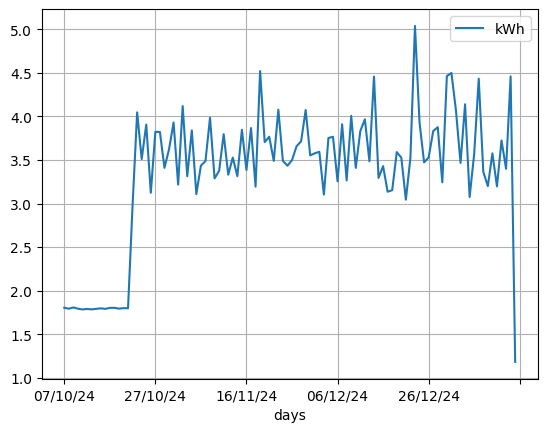

In [436]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2025-01-14 00:00:02.771469	2025-01-14 09:02:45.685469	9h 2m 42s 	1000
2025-01-14 09:02:45.685469	2025-01-14 10:08:10.956469	1h 5m 25s 	182
<class 'pandas.core.frame.DataFrame'>
Index: 1182 entries, 1795158 to 1796339
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1182 non-null   int64         
 1   kWh        1182 non-null   float64       
 2   sec        1182 non-null   float64       
 3   Wh         1182 non-null   float64       
 4   cumul(ms)  1182 non-null   int64         
 5   dates      1182 non-null   datetime64[ns]
 6   days       1182 non-null   object        
 7   heure      1182 non-null   object        
 8   hours      1182 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 92.3+ KB


('14/01/25', <Axes: xlabel='hours'>)

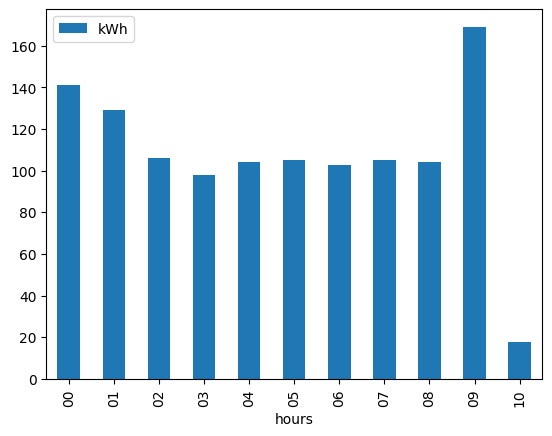

In [437]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [438]:
df_grp

,kWh
days,
21/08/23,0.628
22/08/23,3.697
23/08/23,4.238
24/08/23,3.687
25/08/23,3.986
...,...
10/01/25,3.197
11/01/25,3.723
12/01/25,3.398


In [439]:
# select number of days to display
span = 30
#df_grp.tail(span)


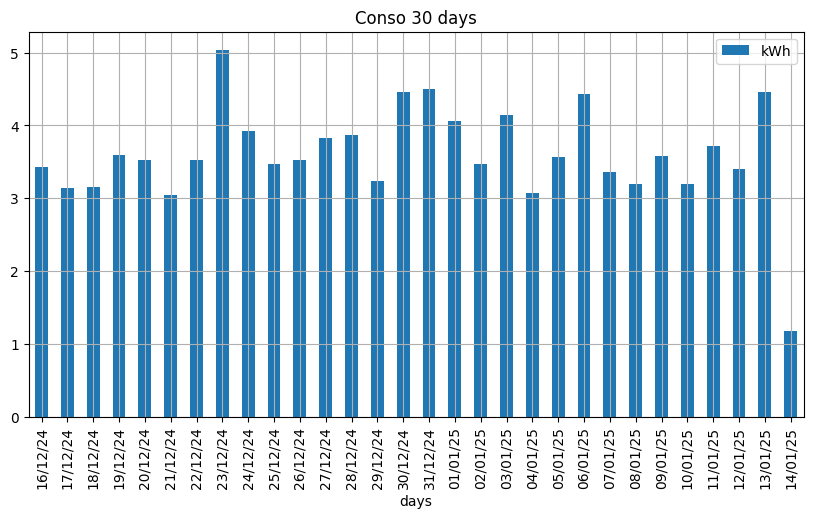

In [440]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


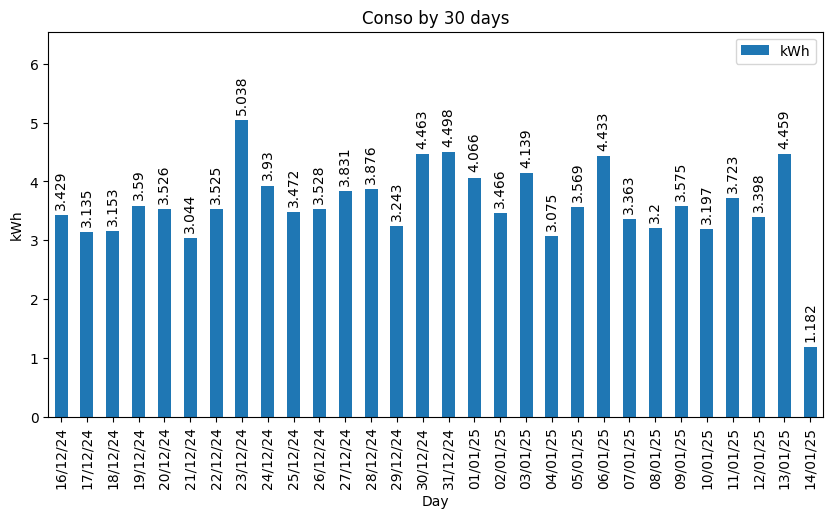

In [441]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [442]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
16/12/24    3.429
17/12/24    3.135
18/12/24    3.153
19/12/24    3.590
20/12/24    3.526
21/12/24    3.044
22/12/24    3.525
23/12/24    5.038
24/12/24    3.930
25/12/24    3.472
26/12/24    3.528
27/12/24    3.831
28/12/24    3.876
29/12/24    3.243
30/12/24    4.463
31/12/24    4.498
01/01/25    4.066
02/01/25    3.466
03/01/25    4.139
04/01/25    3.075
05/01/25    3.569
06/01/25    4.433
07/01/25    3.363
08/01/25    3.200
09/01/25    3.575
10/01/25    3.197
11/01/25    3.723
12/01/25    3.398
13/01/25    4.459
14/01/25    1.182
Name: kWh, dtype: float64

In [443]:
x_labels=df_grp.tail(span).index
x_labels

Index(['16/12/24', '17/12/24', '18/12/24', '19/12/24', '20/12/24', '21/12/24',
       '22/12/24', '23/12/24', '24/12/24', '25/12/24', '26/12/24', '27/12/24',
       '28/12/24', '29/12/24', '30/12/24', '31/12/24', '01/01/25', '02/01/25',
       '03/01/25', '04/01/25', '05/01/25', '06/01/25', '07/01/25', '08/01/25',
       '09/01/25', '10/01/25', '11/01/25', '12/01/25', '13/01/25', '14/01/25'],
      dtype='object', name='days')

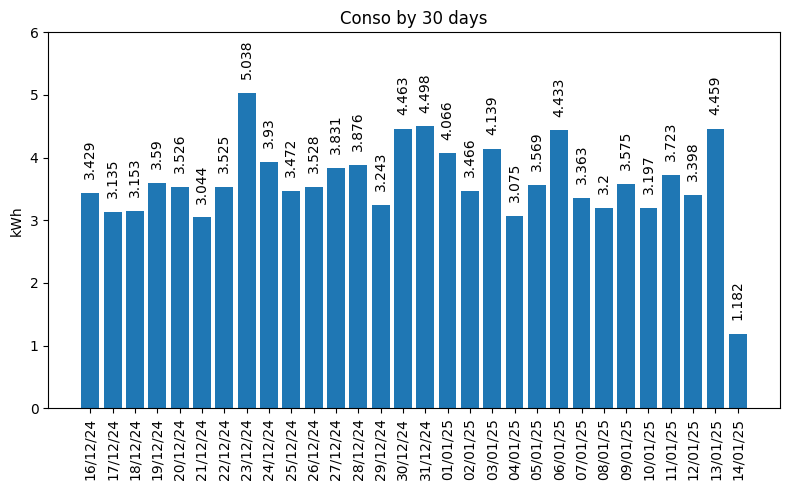

In [444]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [445]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

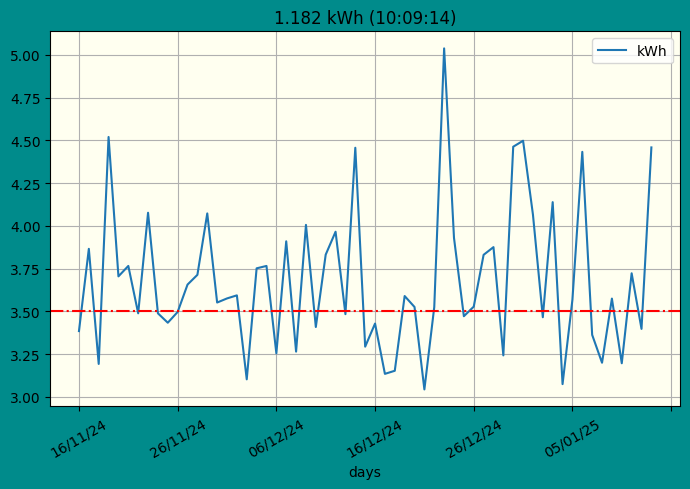

In [446]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

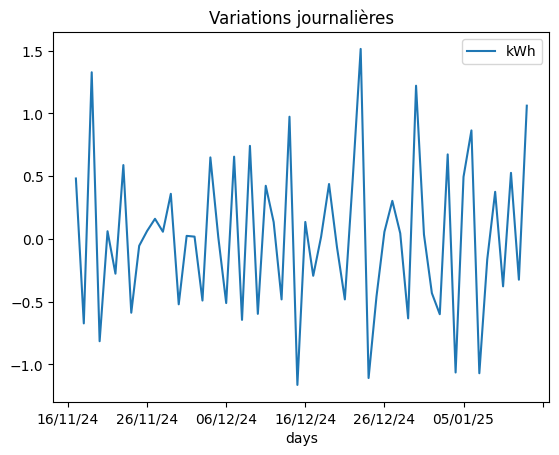

In [447]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [448]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:39:57.893469,21/08/23,20
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:40:19.751469,21/08/23,20
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:40:41.752469,21/08/23,20
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:41:03.680469,21/08/23,20
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:41:25.571469,21/08/23,20
...,...,...,...,...,...,...,...,...
1796335,28947,0.12,28.947,124.365219,44198802703,2025-01-14 10:06:18.662469,14/01/25,10
1796336,27841,0.13,27.841,129.305700,44198830544,2025-01-14 10:06:46.503469,14/01/25,10
1796337,27821,0.13,27.821,129.398656,44198858365,2025-01-14 10:07:14.324469,14/01/25,10
1796338,28121,0.13,28.121,128.018207,44198886486,2025-01-14 10:07:42.445469,14/01/25,10


In [449]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [450]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [451]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [452]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [453]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,628
22/08/23,3697
23/08/23,4238
24/08/23,3687
25/08/23,3986
...,...
10/01/25,3197
11/01/25,3723
12/01/25,3398


In [454]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:39:57.893469,21/08/23,20
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:40:19.751469,21/08/23,20
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:40:41.752469,21/08/23,20
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:41:03.680469,21/08/23,20
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:41:25.571469,21/08/23,20
...,...,...,...,...,...,...,...,...
1796335,28947,0.12,28.947,124.365219,44198802703,2025-01-14 10:06:18.662469,14/01/25,10
1796336,27841,0.13,27.841,129.305700,44198830544,2025-01-14 10:06:46.503469,14/01/25,10
1796337,27821,0.13,27.821,129.398656,44198858365,2025-01-14 10:07:14.324469,14/01/25,10
1796338,28121,0.13,28.121,128.018207,44198886486,2025-01-14 10:07:42.445469,14/01/25,10


In [455]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 20    0        21/08/23    20  0.16
               1        21/08/23    20  0.16
               2        21/08/23    20  0.16
               3        21/08/23    20  0.16
               4        21/08/23    20  0.16
...                          ...   ...   ...
14/01/25 10    1796335  14/01/25    10  0.12
               1796336  14/01/25    10  0.13
               1796337  14/01/25    10  0.13
               1796338  14/01/25    10  0.13
               1796339  14/01/25    10  0.13

[1796340 rows x 3 columns]

In [456]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [457]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('22/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/23', '15'), ('23/08/23', '16'), ('23/08/2

In [458]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,628,628
22/08/23,3697,3697
23/08/23,4238,4238
24/08/23,3687,3687
25/08/23,3986,3986
...,...,...
10/01/25,3197,3197
11/01/25,3723,3723
12/01/25,3398,3398


In [459]:
grp_by_day['kWh'].cumsum()

days
21/08/23        628
22/08/23       4325
23/08/23       8563
24/08/23      12250
25/08/23      16236
             ...   
10/01/25    1783578
11/01/25    1787301
12/01/25    1790699
13/01/25    1795158
14/01/25    1796340
Name: kWh, Length: 513, dtype: int64

In [460]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 20      55
         21     277
         22     164
         23     132
22/08/23 00     133
...             ...
14/01/25 06     103
         07     105
         08     104
         09     169
         10      18

[12279 rows x 1 columns]

In [461]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  20            55
          21           332
          22           496
          23           628
22/08/23  00           761
                    ...   
14/01/25  06       1795944
          07       1796049
          08       1796153
          09       1796322
          10       1796340
Name: kWh, Length: 12279, dtype: int64

In [462]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 20      55      55    NaN
         21     277     332  222.0
         22     164     496 -113.0
         23     132     628  -32.0
22/08/23 00     133     133    NaN
...             ...     ...    ...
14/01/25 06     103     786   -2.0
         07     105     891    2.0
         08     104     995   -1.0
         09     169    1164   65.0
         10      18    1182 -151.0

[12279 rows x 3 columns]

In [463]:
today, grp_by_dayhours.loc[today]

('14/01/25',
        kWh  cumsum   diff
 hours                    
 00     141     141    NaN
 01     129     270  -12.0
 02     106     376  -23.0
 03      98     474   -8.0
 04     104     578    6.0
 05     105     683    1.0
 06     103     786   -2.0
 07     105     891    2.0
 08     104     995   -1.0
 09     169    1164   65.0
 10      18    1182 -151.0)

Text(0.5, 1.0, 'Cumul journalier')

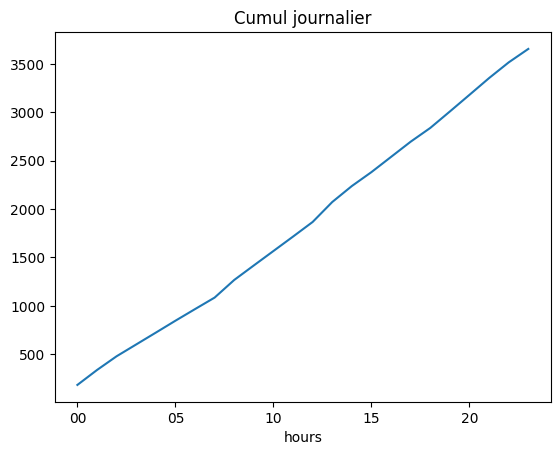

In [464]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

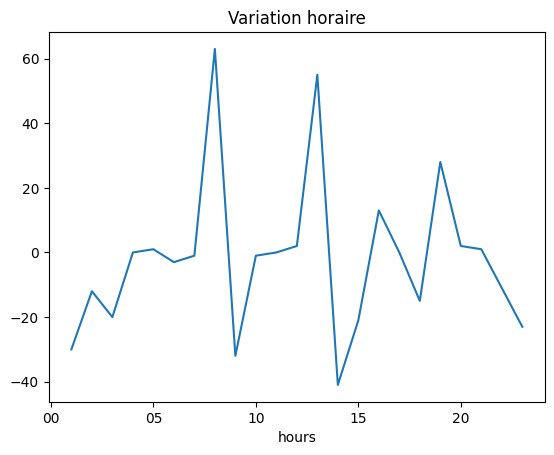

In [465]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [466]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

513

In [467]:
df_grp.tail(n)['kWh'].describe()


count    513.000000
mean       3.501637
std        0.688612
min        0.628000
25%        3.338000
50%        3.617000
75%        3.878000
max        5.093000
Name: kWh, dtype: float64

In [468]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '513 days')

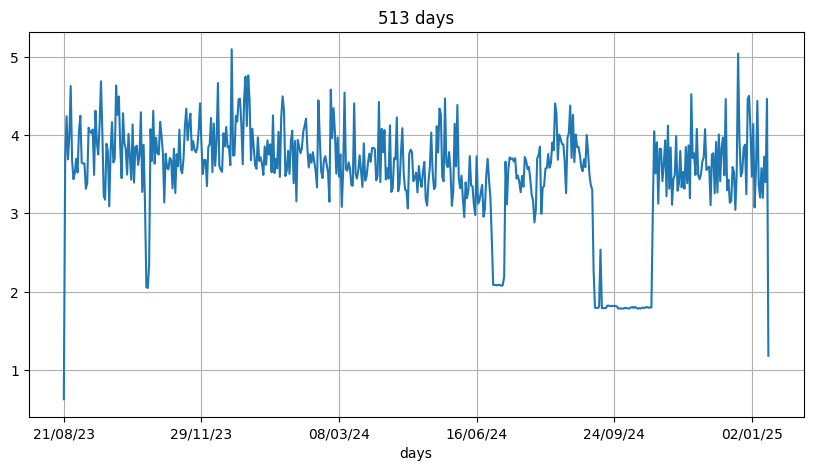

In [469]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '400 days')

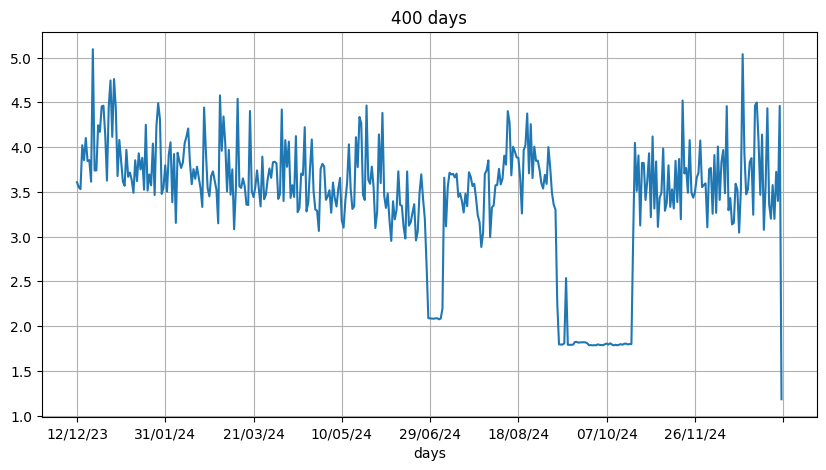

In [470]:
# show conso in span 
span = 400
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [471]:
df_grp['kWh']

days
21/08/23    0.628
22/08/23    3.697
23/08/23    4.238
24/08/23    3.687
25/08/23    3.986
            ...  
10/01/25    3.197
11/01/25    3.723
12/01/25    3.398
13/01/25    4.459
14/01/25    1.182
Name: kWh, Length: 513, dtype: float64

In [472]:
df_grp.describe()

,kWh
count,513.000000
mean,3.501637
std,0.688612
min,0.628000
25%,3.338000
50%,3.617000
75%,3.878000
max,5.093000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

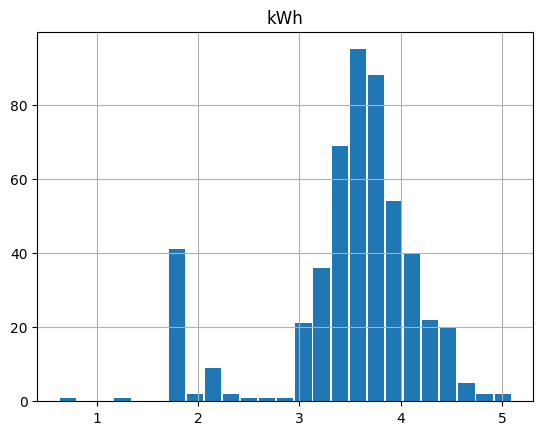

In [473]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [474]:
df_grp.tail(span)['kWh']

days
12/12/23    3.607
13/12/23    3.553
14/12/23    3.529
15/12/23    4.020
16/12/23    3.853
            ...  
10/01/25    3.197
11/01/25    3.723
12/01/25    3.398
13/01/25    4.459
14/01/25    1.182
Name: kWh, Length: 400, dtype: float64

# Conso par heure

In [475]:
day

'14/01/25'

In [476]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,141,141,NaN
01,129,270,-12.0
02,106,376,-23.0
03,98,474,-8.0
04,104,578,6.0
05,105,683,1.0
06,103,786,-2.0
07,105,891,2.0
08,104,995,-1.0


In [477]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


11

In [478]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 12)

In [479]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [480]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [481]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
Name: days, dtype: float64

In [482]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [483]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 00 to 10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     11 non-null     int64  
 1   cumsum  11 non-null     int64  
 2   diff    10 non-null     float64
 3   days    11 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 440.0+ bytes


In [484]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
Name: days, dtype: float64

In [485]:
day

'14/01/25'

In [486]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,141,141,NaN,1.0
01,129,270,-12.0,2.0
02,106,376,-23.0,3.0
03,98,474,-8.0,4.0
04,104,578,6.0,5.0
05,105,683,1.0,6.0
06,103,786,-2.0,7.0
07,105,891,2.0,8.0
08,104,995,-1.0,9.0


Text(0.5, 1.0, '14/01/25')

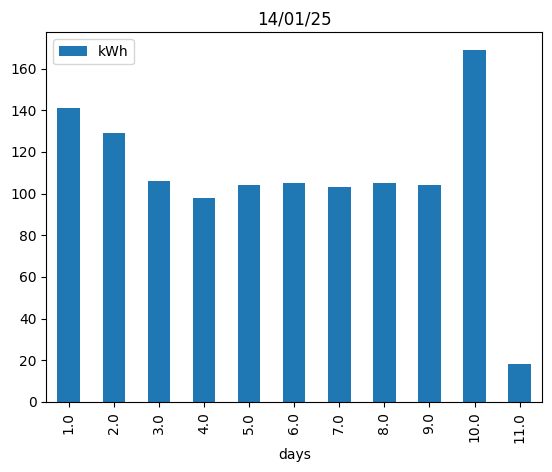

In [487]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [488]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'], dtype='object', name='hours')

# Conso du jour


In [489]:
groupedbyhour.count()

,kWh
hours,
00,141
01,129
02,106
03,98
04,104
05,105
06,103
07,105
08,104


In [490]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    166
01    149
02    169
03    168
04    150
05    167
06    145
07    123
08    130
09    114
10    131
11    129
12    116
13    130
14    179
15    157
16    154
17    940
18    189
19    280
20    312
21    299
22    305
23    291
Name: kWh, dtype: int64

In [491]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

334.293

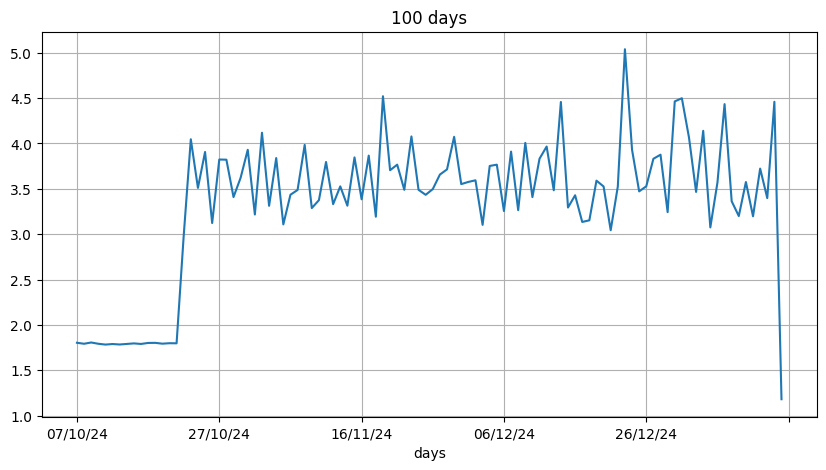

In [492]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

In [493]:
df_grp.tail(1)

,kWh
days,
14/01/25,1.182


In [494]:
span = 1
#df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
#plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

1.182

In [495]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

130.90903401374817


# Today

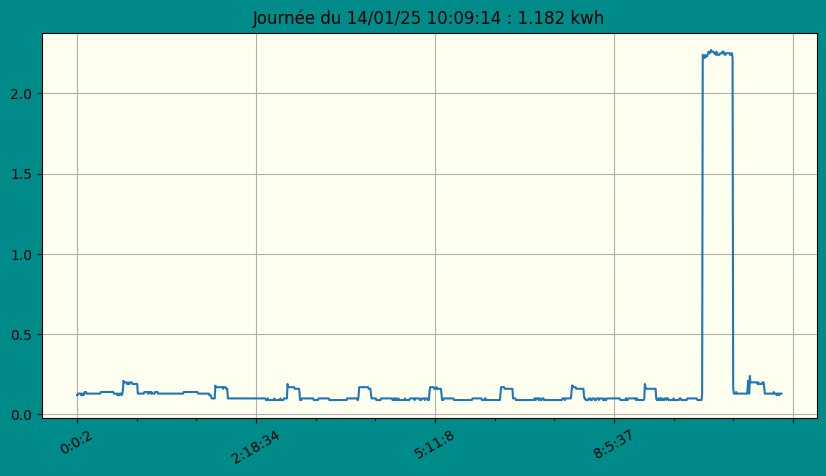

In [496]:
show(today,bgcolor='ivory')

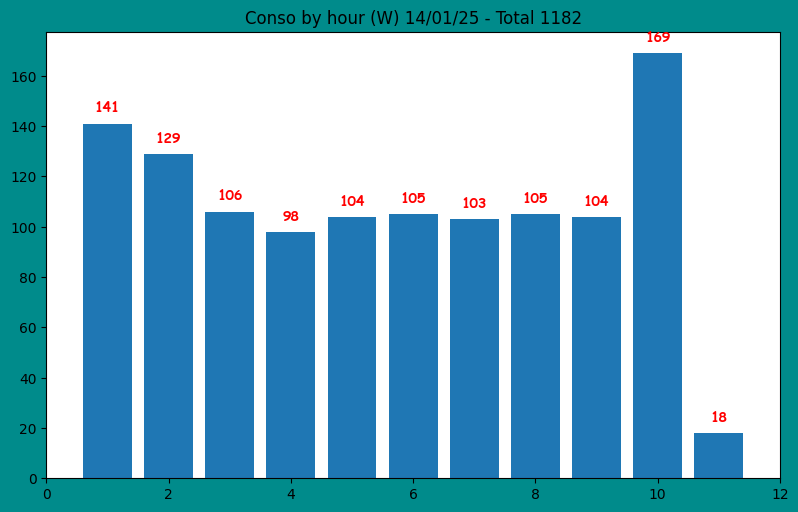

In [497]:
conso_by_hour(today)

In [498]:
day = '03/01/25'

('03/01/25', None)

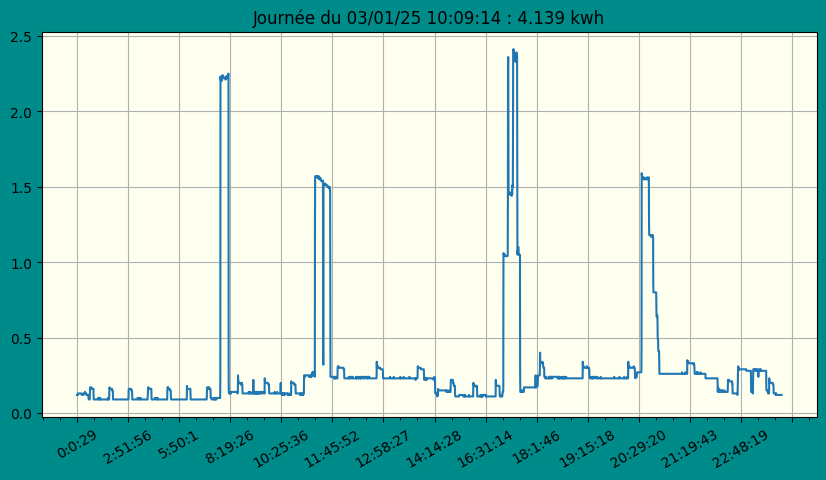

In [499]:
day, show(day,bgcolor='ivory')

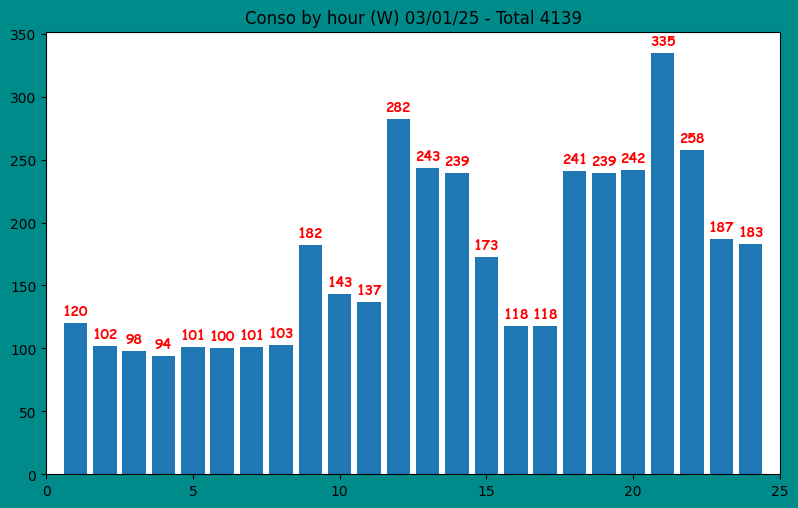

In [500]:
conso_by_hour(day)

In [501]:
maxday

'21/12/23'

('21/12/23', None)

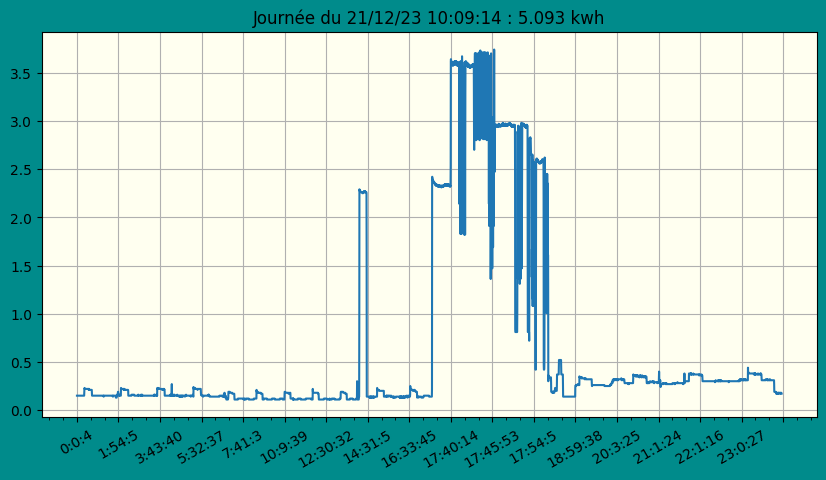

In [502]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

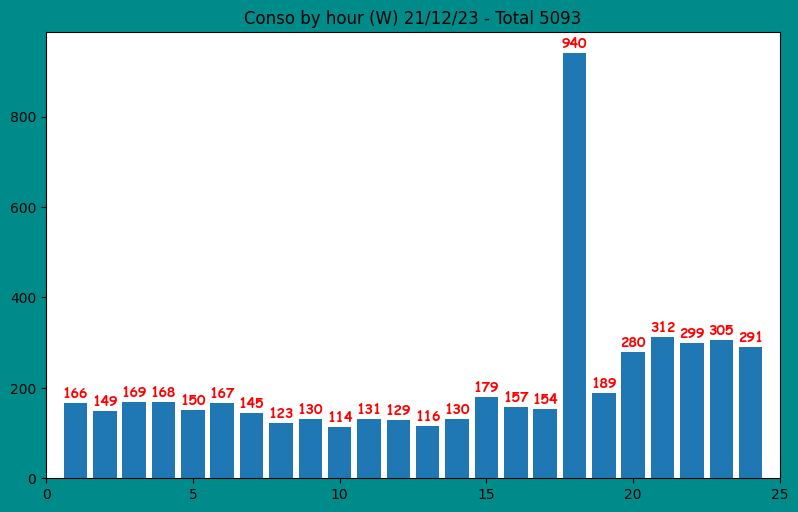

In [503]:
conso_by_hour(day)

In [504]:
sum(data)

5093

In [505]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,141,141,NaN,1.0
01,129,270,-12.0,2.0
02,106,376,-23.0,3.0
03,98,474,-8.0,4.0
04,104,578,6.0,5.0
05,105,683,1.0,6.0
06,103,786,-2.0,7.0
07,105,891,2.0,8.0
08,104,995,-1.0,9.0


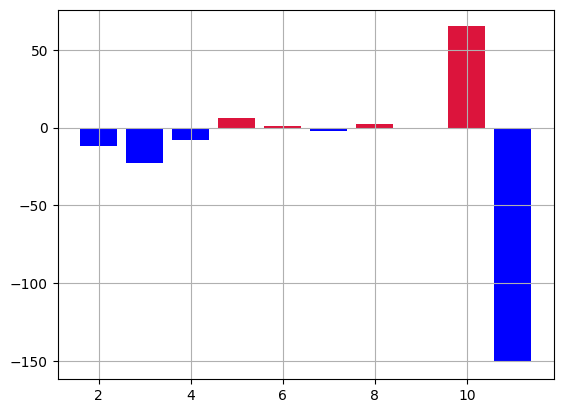

In [506]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [507]:
data

hours
00    166
01    149
02    169
03    168
04    150
05    167
06    145
07    123
08    130
09    114
10    131
11    129
12    116
13    130
14    179
15    157
16    154
17    940
18    189
19    280
20    312
21    299
22    305
23    291
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

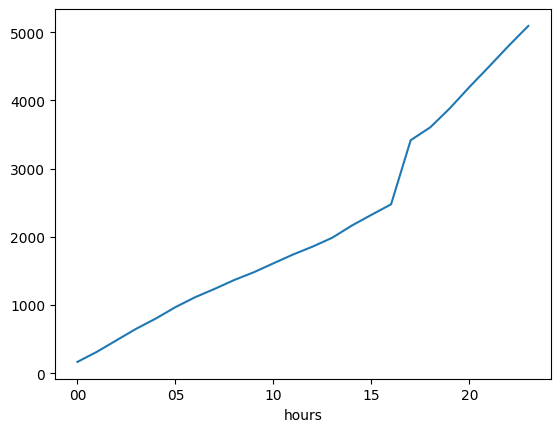

In [508]:
data.cumsum().plot()


<Axes: xlabel='hours'>

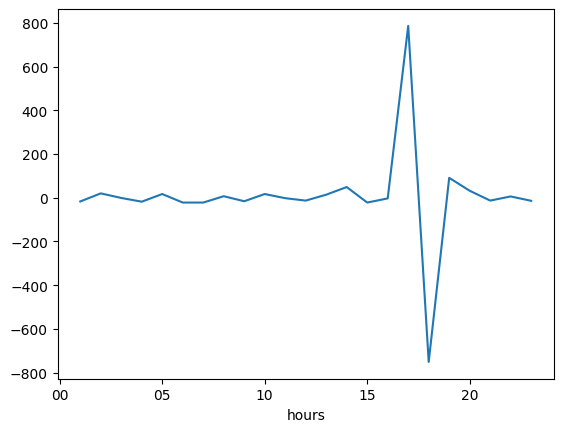

In [509]:
# evolution par heure
data.diff().plot()

In [510]:
data.diff().describe()

count     23.000000
mean       5.434783
std      233.252853
min     -751.000000
25%      -16.500000
50%       -2.000000
75%       17.000000
max      786.000000
Name: kWh, dtype: float64

<Axes: >

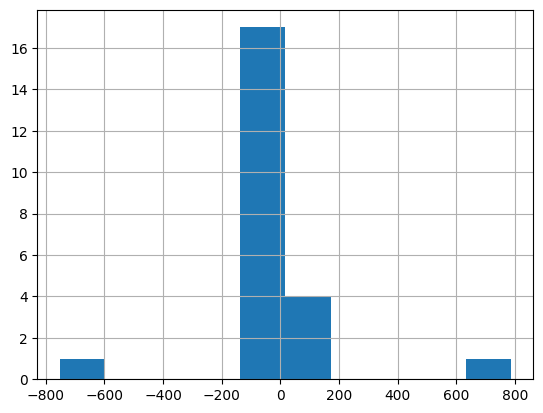

In [511]:
data.diff().hist()

# Test sauvegarde

In [512]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.git_old',
 '.ipynb_checkpoints',
 '1row.flf',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'average_binding_energy_by_nucleons.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 

In [513]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [514]:
#conso_byhour(day)

In [515]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


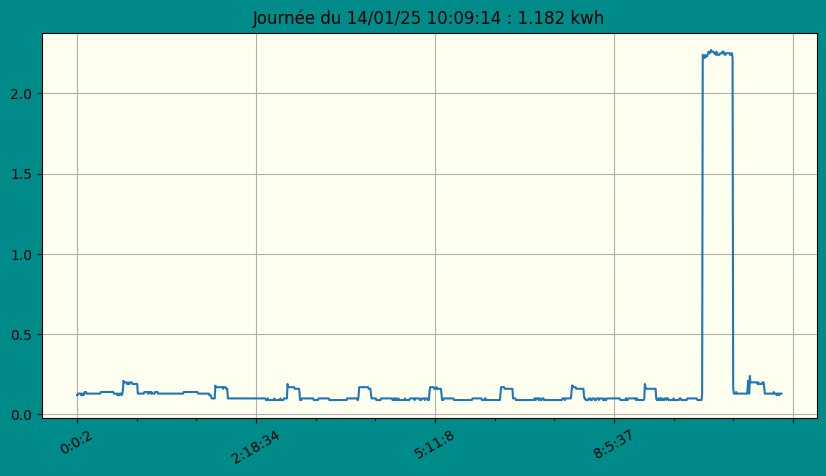

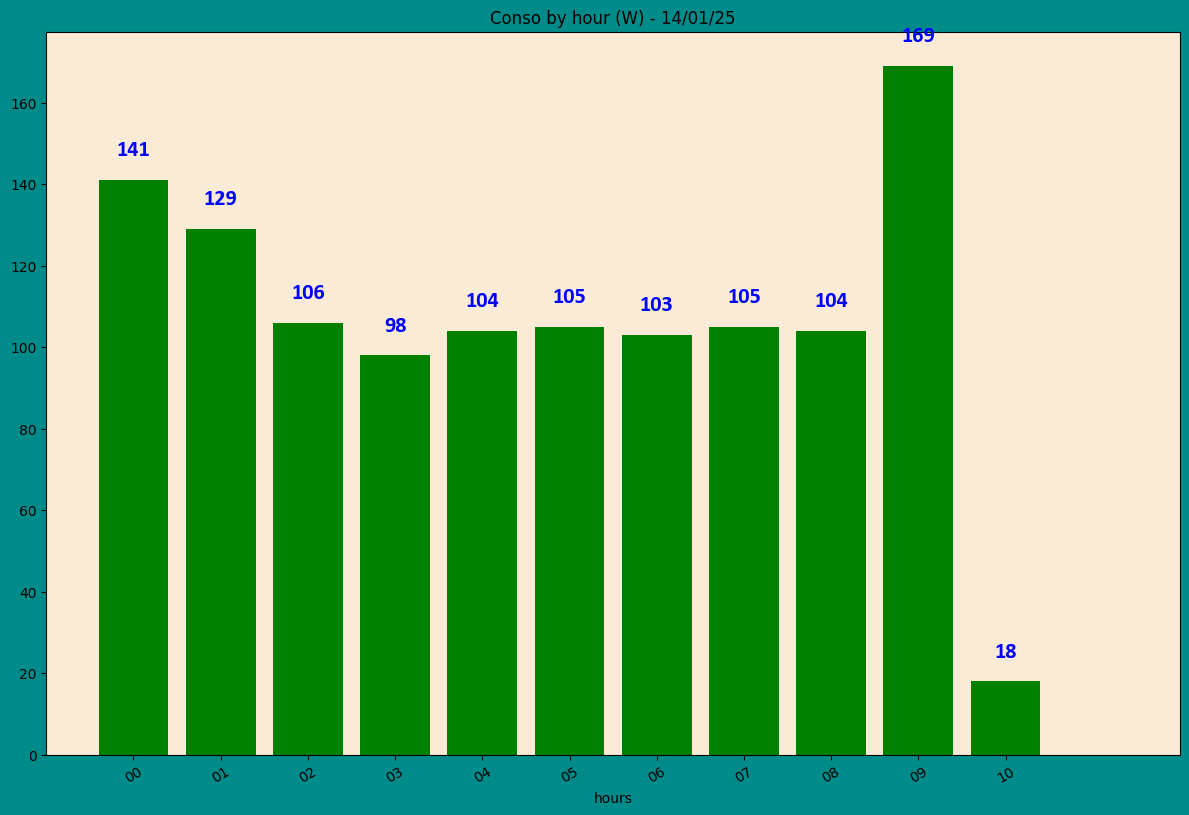

In [516]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [517]:
month.describe()


count    30.000000
mean      3.674600
std       0.504049
min       3.044000
25%       3.311250
50%       3.527000
75%       3.916500
max       5.038000
Name: kWh, dtype: float64

<Axes: >

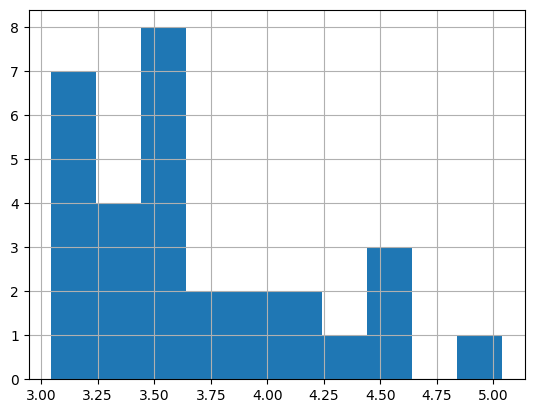

In [518]:
month.hist()

<Axes: xlabel='days'>

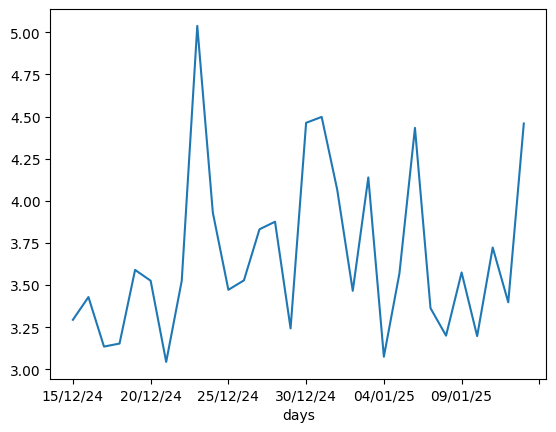

In [519]:
month.plot()

In [520]:
# date with max conso in 1 month
month.idxmax()

'23/12/24'

In [521]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'23/12/24'

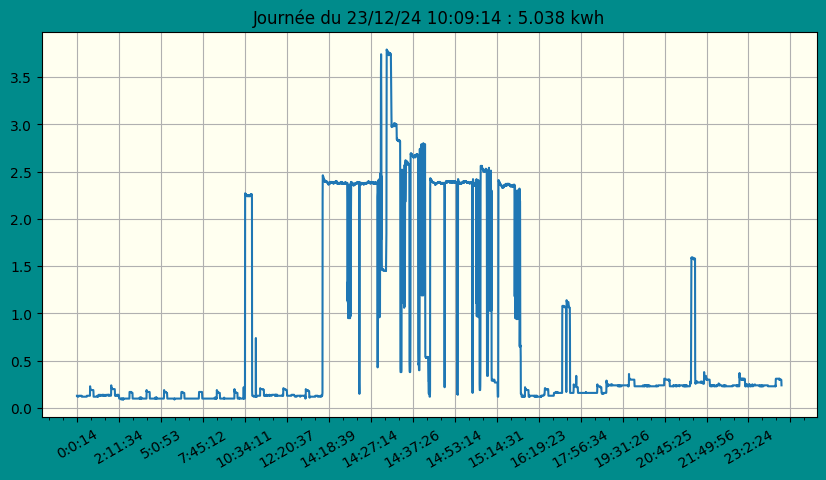

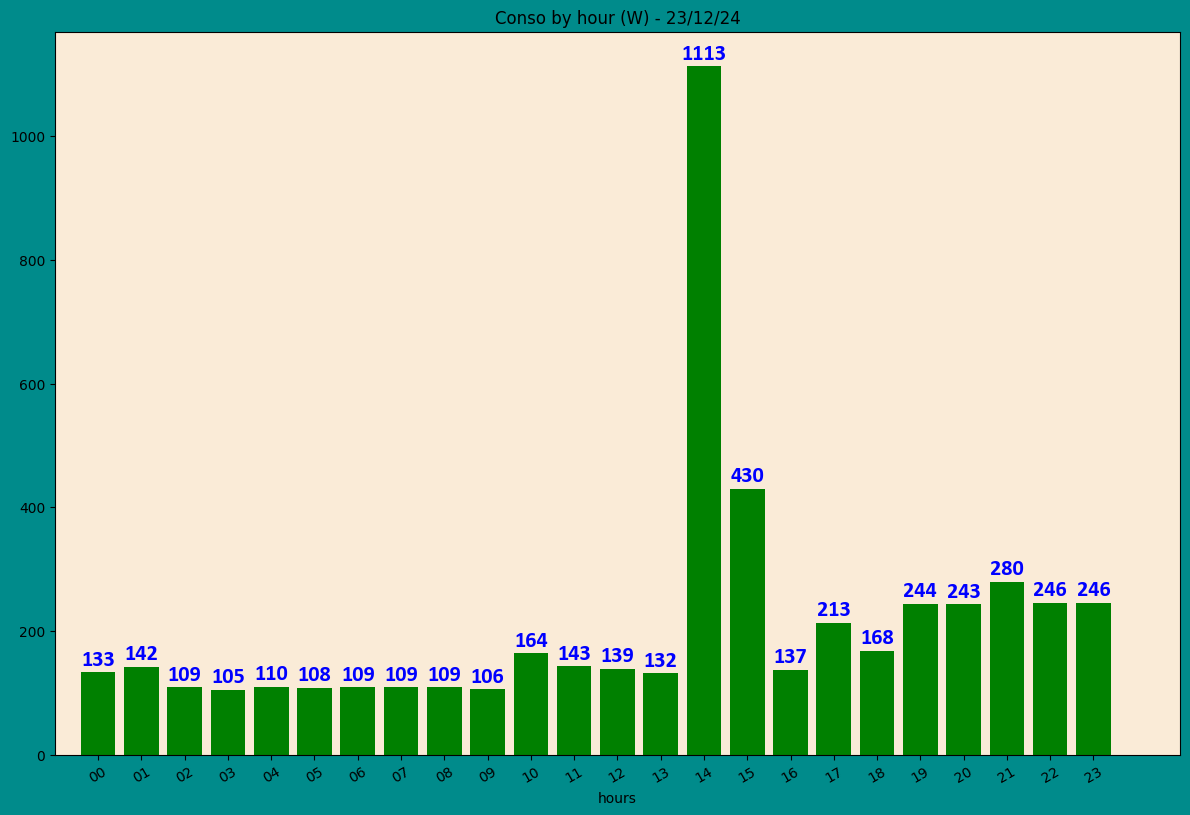

In [522]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [523]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 20      55      55    NaN   NaN
         21     277     332  222.0   NaN
         22     164     496 -113.0   NaN
         23     132     628  -32.0   NaN
22/08/23 00     133     133    NaN   NaN
...             ...     ...    ...   ...
14/01/25 06     103     786   -2.0   7.0
         07     105     891    2.0   8.0
         08     104     995   -1.0   9.0
         09     169    1164   65.0  10.0
         10      18    1182 -151.0  11.0

[12279 rows x 4 columns]

In [524]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,133,133,NaN,NaN
01,142,275,9.0,NaN
02,109,384,-33.0,NaN
03,105,489,-4.0,NaN
04,110,599,5.0,NaN
05,108,707,-2.0,NaN
06,109,816,1.0,NaN
07,109,925,0.0,NaN
08,109,1034,0.0,NaN


In [525]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

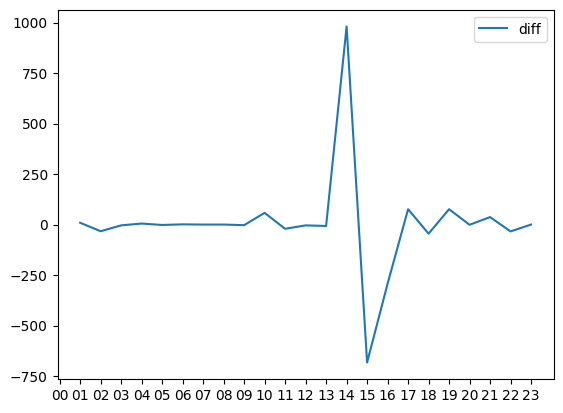

In [526]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

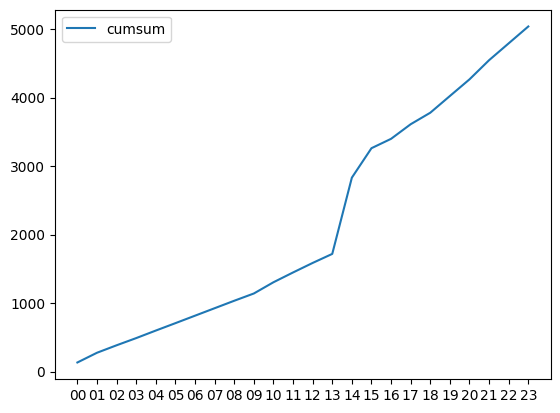

In [527]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [528]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB